In [1]:
import util
from config import *
from util import *

In [2]:
#name='LiH_1000'
#name='H4_1000'
#name='C_1000'
#name='N_1000'
#name='O_1000'
name='N2_5000'

util.reference_energies['N']=-54.5879
util.reference_energies['O']=-75.065

system=name.split('_')[0]
logdir=logdir+'/10_11/{}'.format(name)
evaldir=logdir

smoothing=5000

runs={r:cleanlabel(util.getconfig(logdir,r)['notes']) for r in os.listdir(logdir)}
runs=filter_runs(runs,[('prox','kfac')])


ref=util.reference_energies[system]-.00004

runs

{'kfac_0.05_1': 'N2 kfac 0.05 ', 'proxsr_0.005_1': 'N2 proxsr 0.005 '}

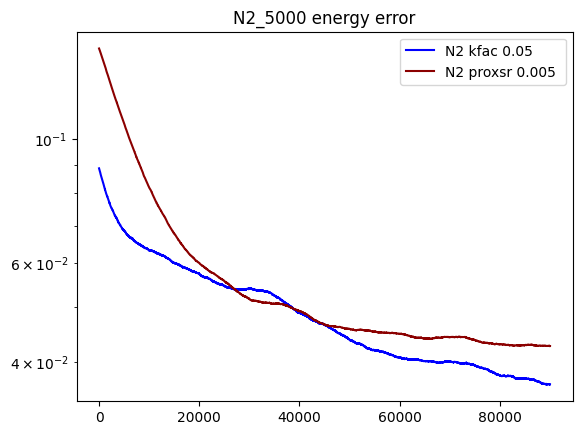

In [3]:
for r,note in runs.items():
    c=get_optimizer_color(note)
    try:
        energies=util.getenergies(logdir,r)-ref
        energies=util.gausskernel(energies,smoothing)
        plt.plot(energies,label=note,color=c)
    except Exception as e:
        print('skip',r,note,e)
    
plt.title(name+' energy error')
plt.legend()
plt.yscale('log')
savefig(plotdir,"energy_train/"+name)

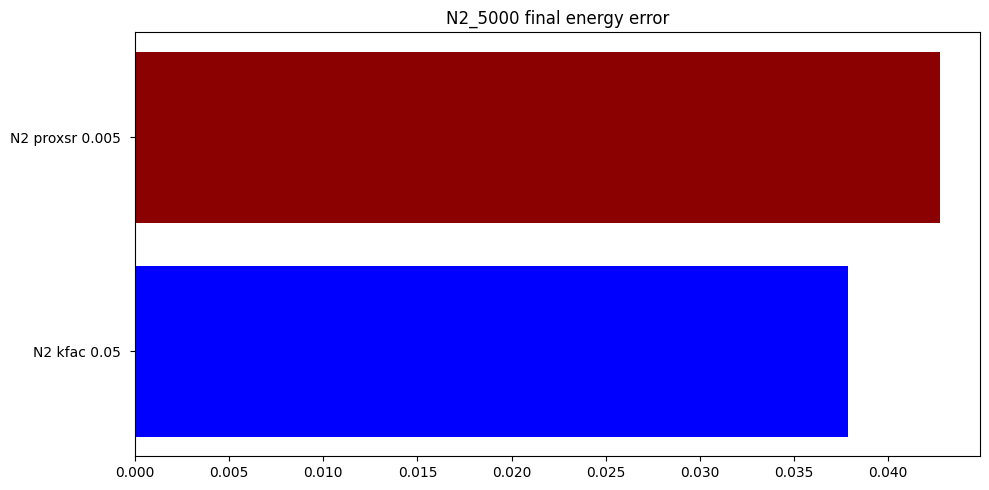

In [4]:
labels=[cleanlabel(n) for r,n in runs.items()]
errors=[getevalenergy(evaldir,r)-ref for r in runs]
colors=[get_optimizer_color(n) for r,n in runs.items()]
 

#labels=['unfinished' if e==-1 else cleanlabel(n) for e,n in zip(errors,runs.values())]

plt.figure(figsize=(10,5))
plt.title(name+' final energy error')
plt.barh(labels,errors,color=colors)
#plt.xscale('log')
plt.tight_layout()
savefig(plotdir,'energy_final_'+name)

In [5]:
for r in runs:
    print(getevalenergy(evaldir,r))
print(ref)

-109.1642825454712
-109.15940361633301
-109.20214
